# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.195718e+01     1.534256e+01
 * time: 0.0029840469360351562
     1     6.155181e+01     9.042498e+00
 * time: 0.008735179901123047
     2     5.594965e+01     1.242185e+01
 * time: 0.0217440128326416
     3     3.969960e+01     8.668128e+00
 * time: 0.03959202766418457
     4     2.874476e+01     7.837484e+00
 * time: 0.14103317260742188
     5     2.002264e+01     5.073883e+00
 * time: 0.15682506561279297
     6     1.452056e+01     4.968537e+00
 * time: 0.16978716850280762
     7     1.149647e+01     4.378208e+00
 * time: 0.18015408515930176
     8     9.242222e+00     3.233505e+00
 * time: 0.19292306900024414
     9     7.032293e+00     1.943983e+00
 * time: 0.2064211368560791
    10     6.621517e+00     2.589220e+00
 * time: 0.2169041633605957
    11     6.429747e+00     1.836769e+00
 * time: 0.2625420093536377
    12     6.315460e+00     1.301125e+00
 * time: 0.27346205711364746
    13     6.181082e+00     1.346956e+00
 * time: 

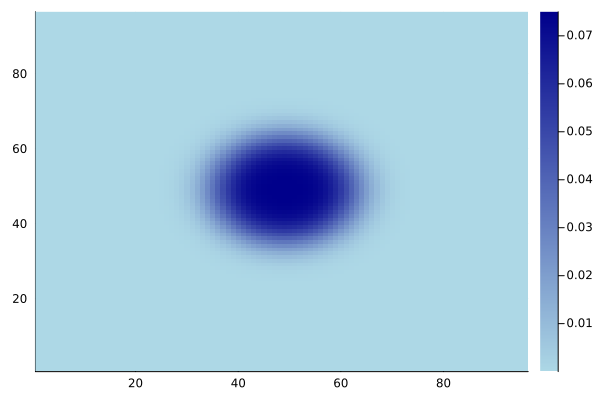

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)